In [1]:
pip install lightgbm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install tqdm

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [3]:
%pip install missingno MissForest

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install statsmodels

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install shap

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [6]:
import pandas as pd
import missingno as msno
from sklearn.model_selection import train_test_split
from missforest import MissForest
from sklearn.ensemble import IsolationForest
from sklearn.ensemble import RandomForestRegressor
from statsmodels.stats.outliers_influence import variance_inflation_factor
import numpy as np
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance
from xgboost import XGBRegressor
import shap
import lightgbm as lgb
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

In [7]:
df = pd.read_csv(r"/workspaces/carlos060495-intro-ml/data/raw/internal-link.csv")
df.set_index('id', inplace=True)
pd.set_option('display.max_columns', None)
df.head()

,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,,,,
2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


#### Mostramos la cantidad de columnas y letras en el DataFrame

In [8]:
df.shape

(48895, 15)

In [9]:
df["host_id"].value_counts()

host_id
219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
            ... 
32045          1
7355           1
45445          1
24680832       1
274035866      1
Name: count, Length: 37457, dtype: int64

#### Elimino la columna host name porque la considero redundante ya que contamos con la columna host id la cual tiene un valor mas "unico" al cual podemos acudir

In [10]:
df.drop(['name', 'host_name', 'neighbourhood'], axis=1, inplace=True)
df

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,
2539,2787,Brooklyn,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
2595,2845,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3831,4869,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
5022,7192,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,8232441,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
36485057,6570630,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
36485431,23492952,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27


#### Buscamos columnas con datos constantes

In [11]:
unicos = df.nunique()
df[unicos[unicos==1].index]


""
id
2539
2595
3647
3831
5022
...
36484665
36485057
36485431


#### Buscamos columnas y filas duplicadas

In [12]:
df.duplicated().sum()

np.int64(0)

In [13]:
df.T.duplicated().sum()

np.int64(0)

#### valores faltantes o nulos

In [14]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

last_review          20.558339
reviews_per_month    20.558339
dtype: float64

In [15]:
df.loc[df['last_review'].isna(), 'reviews_per_month'] = 0


In [16]:
faltantes = df.isna().mean()*100
faltantes[faltantes>0]

last_review    20.558339
dtype: float64

In [17]:
df.isnull().any(axis=1).sum()

np.int64(10052)

In [18]:
n = 1
df[df.isnull().sum(axis=1) ==n]

,host_id,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
id,,,,,,,,,,,,
3647,4632,Manhattan,40.80902,-73.94190,Private room,150,3,0,NaN,0.0,1,365
7750,17985,Manhattan,40.79685,-73.94872,Entire home/apt,190,7,0,NaN,0.0,2,249
8700,26394,Manhattan,40.86754,-73.92639,Private room,80,4,0,NaN,0.0,1,0
11452,7355,Brooklyn,40.68876,-73.94312,Private room,35,60,0,NaN,0.0,1,365
11943,45445,Brooklyn,40.63702,-73.96327,Private room,150,1,0,NaN,0.0,1,365
...,...,...,...,...,...,...,...,...,...,...,...,...
36484665,8232441,Brooklyn,40.67853,-73.94995,Private room,70,2,0,NaN,0.0,2,9
36485057,6570630,Brooklyn,40.70184,-73.93317,Private room,40,4,0,NaN,0.0,2,36
36485431,23492952,Manhattan,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,0.0,1,27


Se llevó a cabo un proceso de limpieza de datos, durante el cual no se identificaron valores nulos o vacíos. Se eliminó una columna por contener información considerada redundante. En cuanto a la columna name, la cantidad de valores faltantes fue mínima, por lo que se optó por conservarla. Por otro lado, aunque las columnas last_review y reviews_per_month presentan una proporción significativa de datos ausentes, se decidió mantenerlas debido a su potencial valor para futuros análisis.


<Axes: >

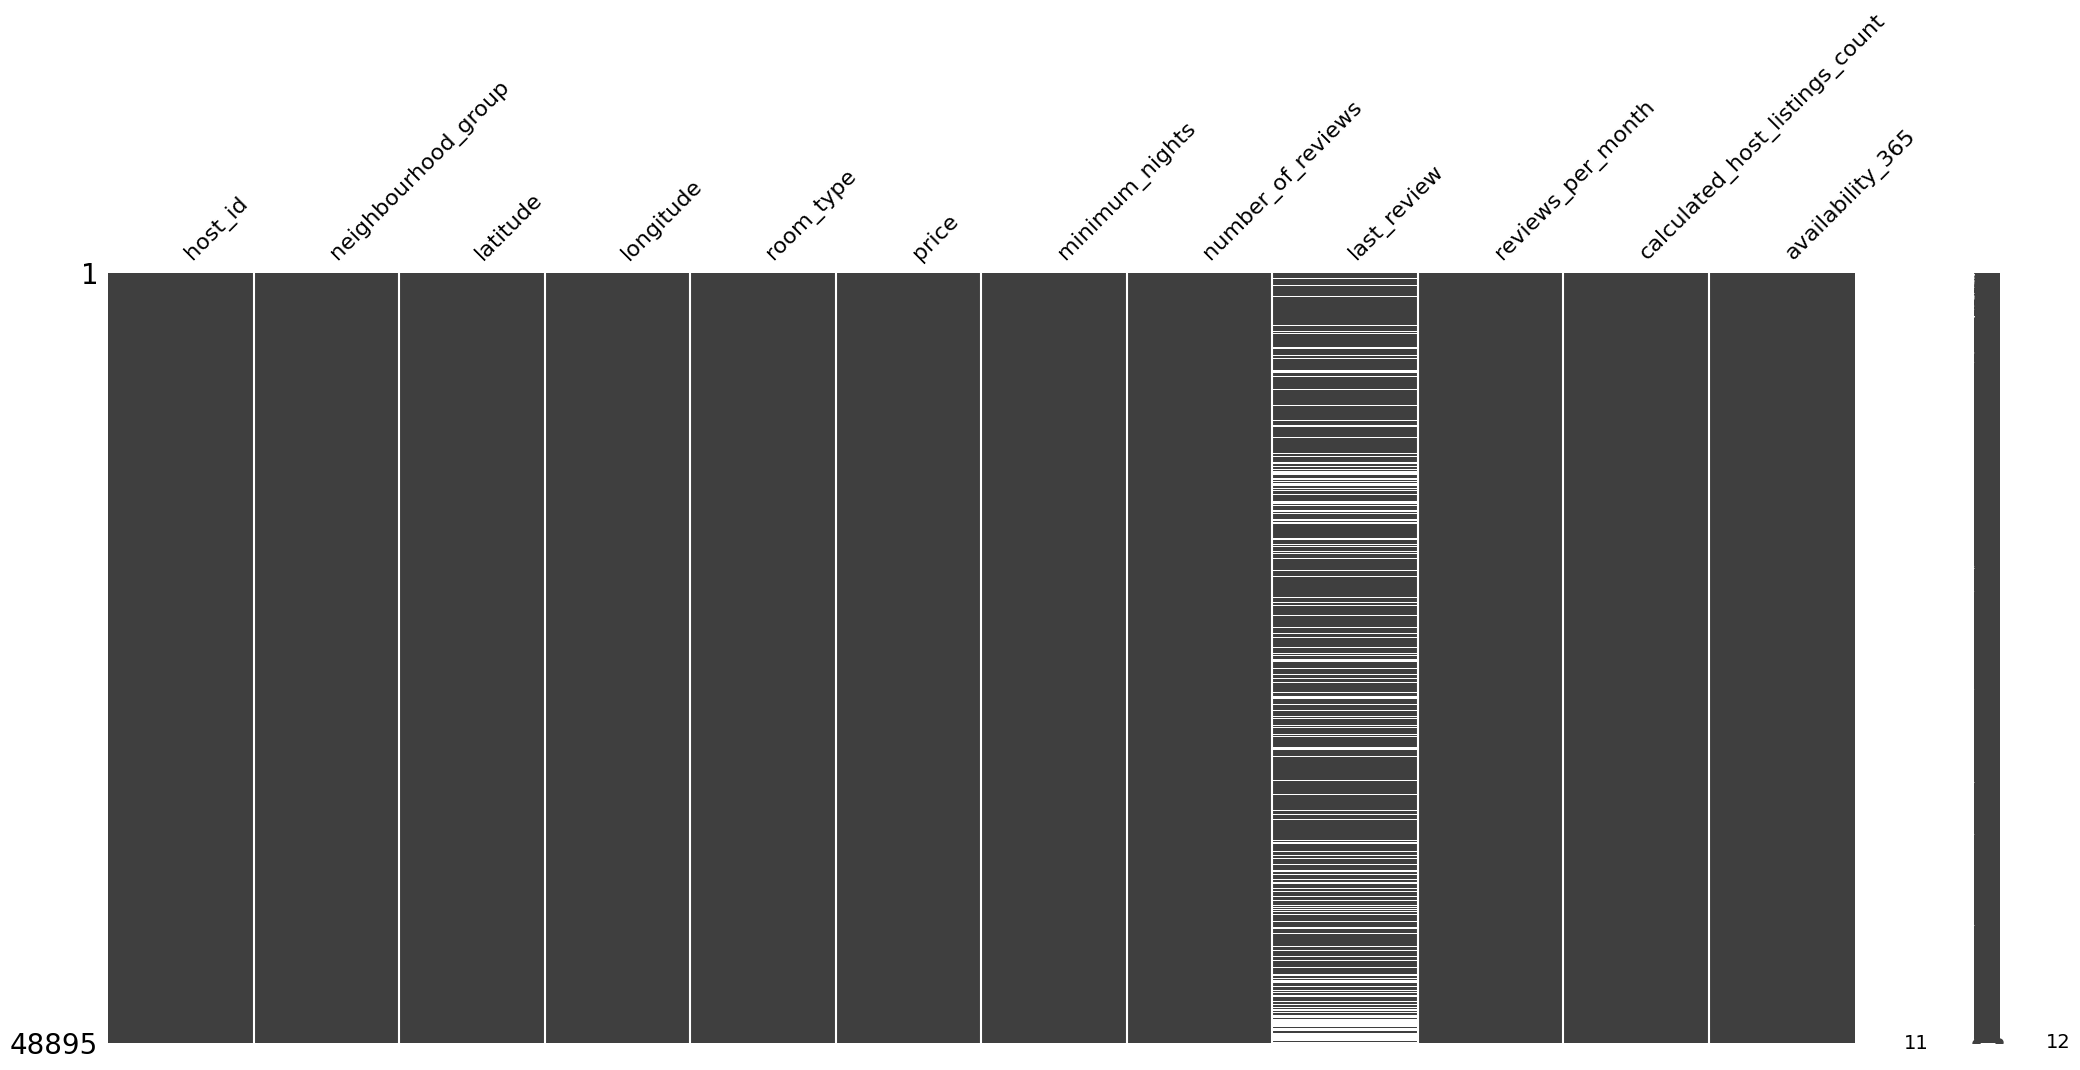

In [19]:
msno.matrix(df)

## Split Train Test

In [20]:
X = df.drop('price',axis=1)
y = df['price']
X.shape

(48895, 11)

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape

(39116, 11)

## Codificación de variables categóricas

In [22]:
encoder = LabelEncoder()
X_train['room_type_code'] = encoder.fit_transform(X_train['room_type'])
X_train['room_type_code'].dtype

dtype('int64')

In [23]:
encoder = LabelEncoder()
X_train['neighbourhood_group_code'] = encoder.fit_transform(X_train['neighbourhood_group'])
X_train['neighbourhood_group_code'].dtype

dtype('int64')

In [24]:
X_train.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_group_code
id,,,,,,,,,,,,,
25674366,9038810,Brooklyn,40.71577,-73.95530,Entire home/apt,3,11,2019-05-16,0.87,1,1,0,1
19100971,81745867,Manhattan,40.84917,-73.94048,Private room,2,2,2018-06-25,0.16,1,0,1,2
24209867,1218837,Brooklyn,40.68993,-73.95947,Private room,2,0,NaN,0.00,2,0,1,1
22451798,4126686,Brooklyn,40.68427,-73.93118,Entire home/apt,3,87,2019-07-05,4.91,1,267,0,1
5344850,27698133,Queens,40.74705,-73.89564,Private room,5,13,2018-12-18,0.25,1,0,1,3


In [25]:
X_train['is_new'] = np.where(
    (X_train['number_of_reviews'] == 0) &
    (X_train['last_review'].isna()) &
    (X_train['reviews_per_month'] == 0.0),
    1, 0
)


In [26]:
X_train.head(5)

,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_group_code,is_new
id,,,,,,,,,,,,,,
25674366,9038810,Brooklyn,40.71577,-73.95530,Entire home/apt,3,11,2019-05-16,0.87,1,1,0,1,0
19100971,81745867,Manhattan,40.84917,-73.94048,Private room,2,2,2018-06-25,0.16,1,0,1,2,0
24209867,1218837,Brooklyn,40.68993,-73.95947,Private room,2,0,NaN,0.00,2,0,1,1,1
22451798,4126686,Brooklyn,40.68427,-73.93118,Entire home/apt,3,87,2019-07-05,4.91,1,267,0,1,0
5344850,27698133,Queens,40.74705,-73.89564,Private room,5,13,2018-12-18,0.25,1,0,1,3,0


## Outliers

In [27]:
pd.set_option('display.float_format', '{:.6f}'.format)
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
host_id,39116.000000,67593557.435167,78670917.793340,2438.000000,7812757.750000,30598307.500000,107434423.000000,274321313.000000
latitude,39116.000000,40.728927,0.054555,40.499790,40.690067,40.723035,40.763180,40.913060
longitude,39116.000000,-73.952311,0.046029,-74.242850,-73.983080,-73.955750,-73.936498,-73.712990
minimum_nights,39116.000000,7.144775,21.472973,1.000000,1.000000,3.000000,5.000000,1250.000000
number_of_reviews,39116.000000,23.334978,44.499352,0.000000,1.000000,5.000000,24.000000,629.000000
reviews_per_month,39116.000000,1.094376,1.604249,0.000000,0.040000,0.370000,1.590000,58.500000
calculated_host_listings_count,39116.000000,7.188925,33.172629,1.000000,1.000000,1.000000,2.000000,327.000000
availability_365,39116.000000,113.445368,131.846430,0.000000,0.000000,46.000000,229.000000,365.000000
room_type_code,39116.000000,0.502480,0.544968,0.000000,0.000000,0.000000,1.000000,2.000000
neighbourhood_group_code,39116.000000,1.673944,0.733618,0.000000,1.000000,2.000000,2.000000,4.000000


In [28]:
iso = IsolationForest(random_state=123)
X_num = X_train.select_dtypes(include=['int64', 'float64'])
df_num = X_train.copy()
df_num['outlier_flag'] = iso.fit_predict(X_num)

In [29]:
df_num['outlier_flag'].value_counts()

outlier_flag
 1    32348
-1     6768
Name: count, dtype: int64

In [30]:
df_num.head()

,host_id,neighbourhood_group,latitude,longitude,room_type,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,room_type_code,neighbourhood_group_code,is_new,outlier_flag
id,,,,,,,,,,,,,,,
25674366,9038810,Brooklyn,40.715770,-73.955300,Entire home/apt,3,11,2019-05-16,0.870000,1,1,0,1,0,1
19100971,81745867,Manhattan,40.849170,-73.940480,Private room,2,2,2018-06-25,0.160000,1,0,1,2,0,1
24209867,1218837,Brooklyn,40.689930,-73.959470,Private room,2,0,NaN,0.000000,2,0,1,1,1,1
22451798,4126686,Brooklyn,40.684270,-73.931180,Entire home/apt,3,87,2019-07-05,4.910000,1,267,0,1,0,1
5344850,27698133,Queens,40.747050,-73.895640,Private room,5,13,2018-12-18,0.250000,1,0,1,3,0,1


## Seleccion de caracteristicas

## Método 1: Feature importance de RF

In [31]:
model = RandomForestRegressor(random_state=42,n_jobs=-1).fit(X_num, y_train)

In [32]:
importances = model.feature_importances_/model.feature_importances_.sum()*100

df_rf_imp = pd.DataFrame({'feature': X_num.columns,'rf_importance': importances}).sort_values(by='rf_importance', ascending=False)

df_rf_imp['rf_importance_acum'] = df_rf_imp['rf_importance'].cumsum()

In [33]:
df_rf_imp

,feature,rf_importance,rf_importance_acum
0,host_id,23.238080,23.238080
2,longitude,20.963823,44.201903
1,latitude,14.750927,58.952830
3,minimum_nights,10.105448,69.058278
7,availability_365,8.469825,77.528103
8,room_type_code,6.167740,83.695843
6,calculated_host_listings_count,5.435579,89.131421
5,reviews_per_month,4.625899,93.757320
4,number_of_reviews,3.300167,97.057487
9,neighbourhood_group_code,2.062468,99.119955


## Método 2: Permutation/Shuffle importance

In [34]:
X_train1, X_val, y_train1, y_val = train_test_split(X_num, y_train, test_size=0.2, random_state=42)

model_xgb = XGBRegressor(objective='reg:squarederror', random_state=42).fit(X_train1, y_train1)

In [35]:
perm = permutation_importance(model_xgb, X_val, y_val, n_repeats=10, random_state=42, n_jobs=-1, scoring='neg_mean_absolute_percentage_error')

In [36]:
df_perm_imp = pd.DataFrame({'feature': X_num.columns, 'perm_imp': perm.importances_mean*100}).sort_values('perm_imp', ascending=False)
df_perm_imp

,feature,perm_imp
5,reviews_per_month,46.827606
4,number_of_reviews,45.337748
8,room_type_code,38.339579
2,longitude,26.889622
1,latitude,14.791906
3,minimum_nights,13.834977
6,calculated_host_listings_count,10.761811
7,availability_365,10.368496
0,host_id,7.436337
9,neighbourhood_group_code,2.005844


## Método 3: SHAP

In [37]:
model_lgbm = lgb.LGBMRegressor(random_state=42, n_jobs=-1).fit(X_train1, y_train1)

explainer = shap.Explainer(model_lgbm, X_val)   # usa el mismo X_val
shap_vals = explainer.shap_values(X_val, check_additivity=False)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002591 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1635
[LightGBM] [Info] Number of data points in the train set: 31292, number of used features: 11
[LightGBM] [Info] Start training from score 153.698581


 98%|===================| 7673/7824 [00:18<00:00]        

In [38]:
imp_shap = np.abs(shap_vals).mean(axis=0)
imp_shap_pct = imp_shap/imp_shap.sum()*100
df_shap_imp = pd.DataFrame({"feature": X_val.columns, "shap_imp": imp_shap_pct}).sort_values('shap_imp', ascending=False)
df_shap_imp

,feature,shap_imp
8,room_type_code,27.744186
2,longitude,14.417824
7,availability_365,13.728032
1,latitude,10.920179
3,minimum_nights,10.203629
4,number_of_reviews,6.318746
5,reviews_per_month,5.485514
6,calculated_host_listings_count,4.956358
0,host_id,3.691348
9,neighbourhood_group_code,2.534184


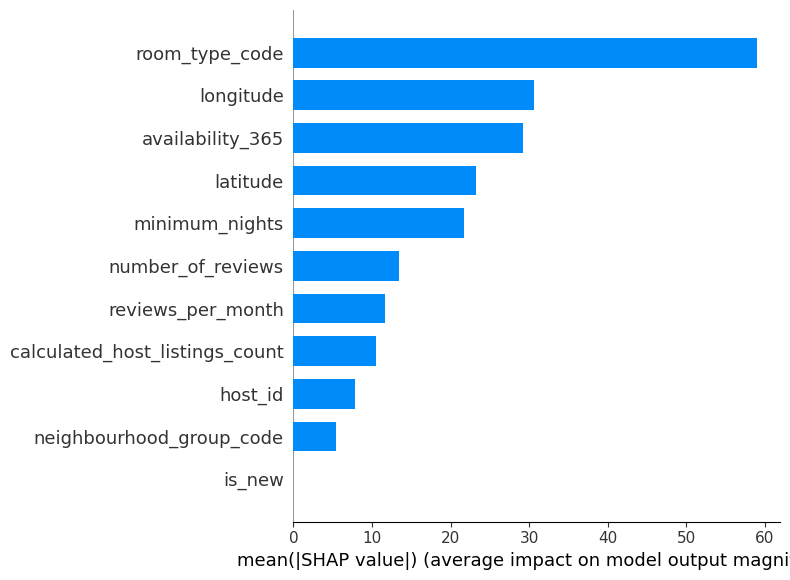

In [39]:
shap.summary_plot(shap_vals, X_val, plot_type="bar")

In [40]:
df_importances = (
    df_rf_imp
    .merge(df_perm_imp, on='feature', how='outer')
    .merge(df_shap_imp, on='feature', how='outer')
).sort_values('rf_importance', ascending=False)
df_importances

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
2,host_id,23.238080,23.238080,7.436337,3.691348
5,longitude,20.963823,44.201903,26.889622,14.417824
4,latitude,14.750927,58.952830,14.791906,10.920179
6,minimum_nights,10.105448,69.058278,13.834977,10.203629
0,availability_365,8.469825,77.528103,10.368496,13.728032
10,room_type_code,6.167740,83.695843,38.339579,27.744186
1,calculated_host_listings_count,5.435579,89.131421,10.761811,4.956358
9,reviews_per_month,4.625899,93.757320,46.827606,5.485514
8,number_of_reviews,3.300167,97.057487,45.337748,6.318746
7,neighbourhood_group_code,2.062468,99.119955,2.005844,2.534184


In [41]:
df_filt = df_importances[(df_importances['rf_importance']>=1)&(df_importances['perm_imp']>=1)&(df_importances['shap_imp']>=1)]
df_filt

,feature,rf_importance,rf_importance_acum,perm_imp,shap_imp
2,host_id,23.238080,23.238080,7.436337,3.691348
5,longitude,20.963823,44.201903,26.889622,14.417824
4,latitude,14.750927,58.952830,14.791906,10.920179
6,minimum_nights,10.105448,69.058278,13.834977,10.203629
0,availability_365,8.469825,77.528103,10.368496,13.728032
10,room_type_code,6.167740,83.695843,38.339579,27.744186
1,calculated_host_listings_count,5.435579,89.131421,10.761811,4.956358
9,reviews_per_month,4.625899,93.757320,46.827606,5.485514
8,number_of_reviews,3.300167,97.057487,45.337748,6.318746
7,neighbourhood_group_code,2.062468,99.119955,2.005844,2.534184


In [42]:
features = df_filt['feature']
features

2                            host_id
5                          longitude
4                           latitude
6                     minimum_nights
0                   availability_365
10                    room_type_code
1     calculated_host_listings_count
9                  reviews_per_month
8                  number_of_reviews
7           neighbourhood_group_code
Name: feature, dtype: object

In [43]:
vif = pd.Series([variance_inflation_factor(X_num[features].corr().values, i) for i in range(X_num[features].corr().shape[1])], index=X_num[features].columns)
df_vif = pd.Series(vif, name='vif').reset_index().rename(columns={'index': 'feature'})
df_vif

,feature,vif
0,host_id,2.668109
1,longitude,1.433300
2,latitude,1.408459
3,minimum_nights,1.251316
4,availability_365,1.899488
5,room_type_code,1.245878
6,calculated_host_listings_count,1.571624
7,reviews_per_month,6.820475
8,number_of_reviews,6.532759
9,neighbourhood_group_code,1.519884


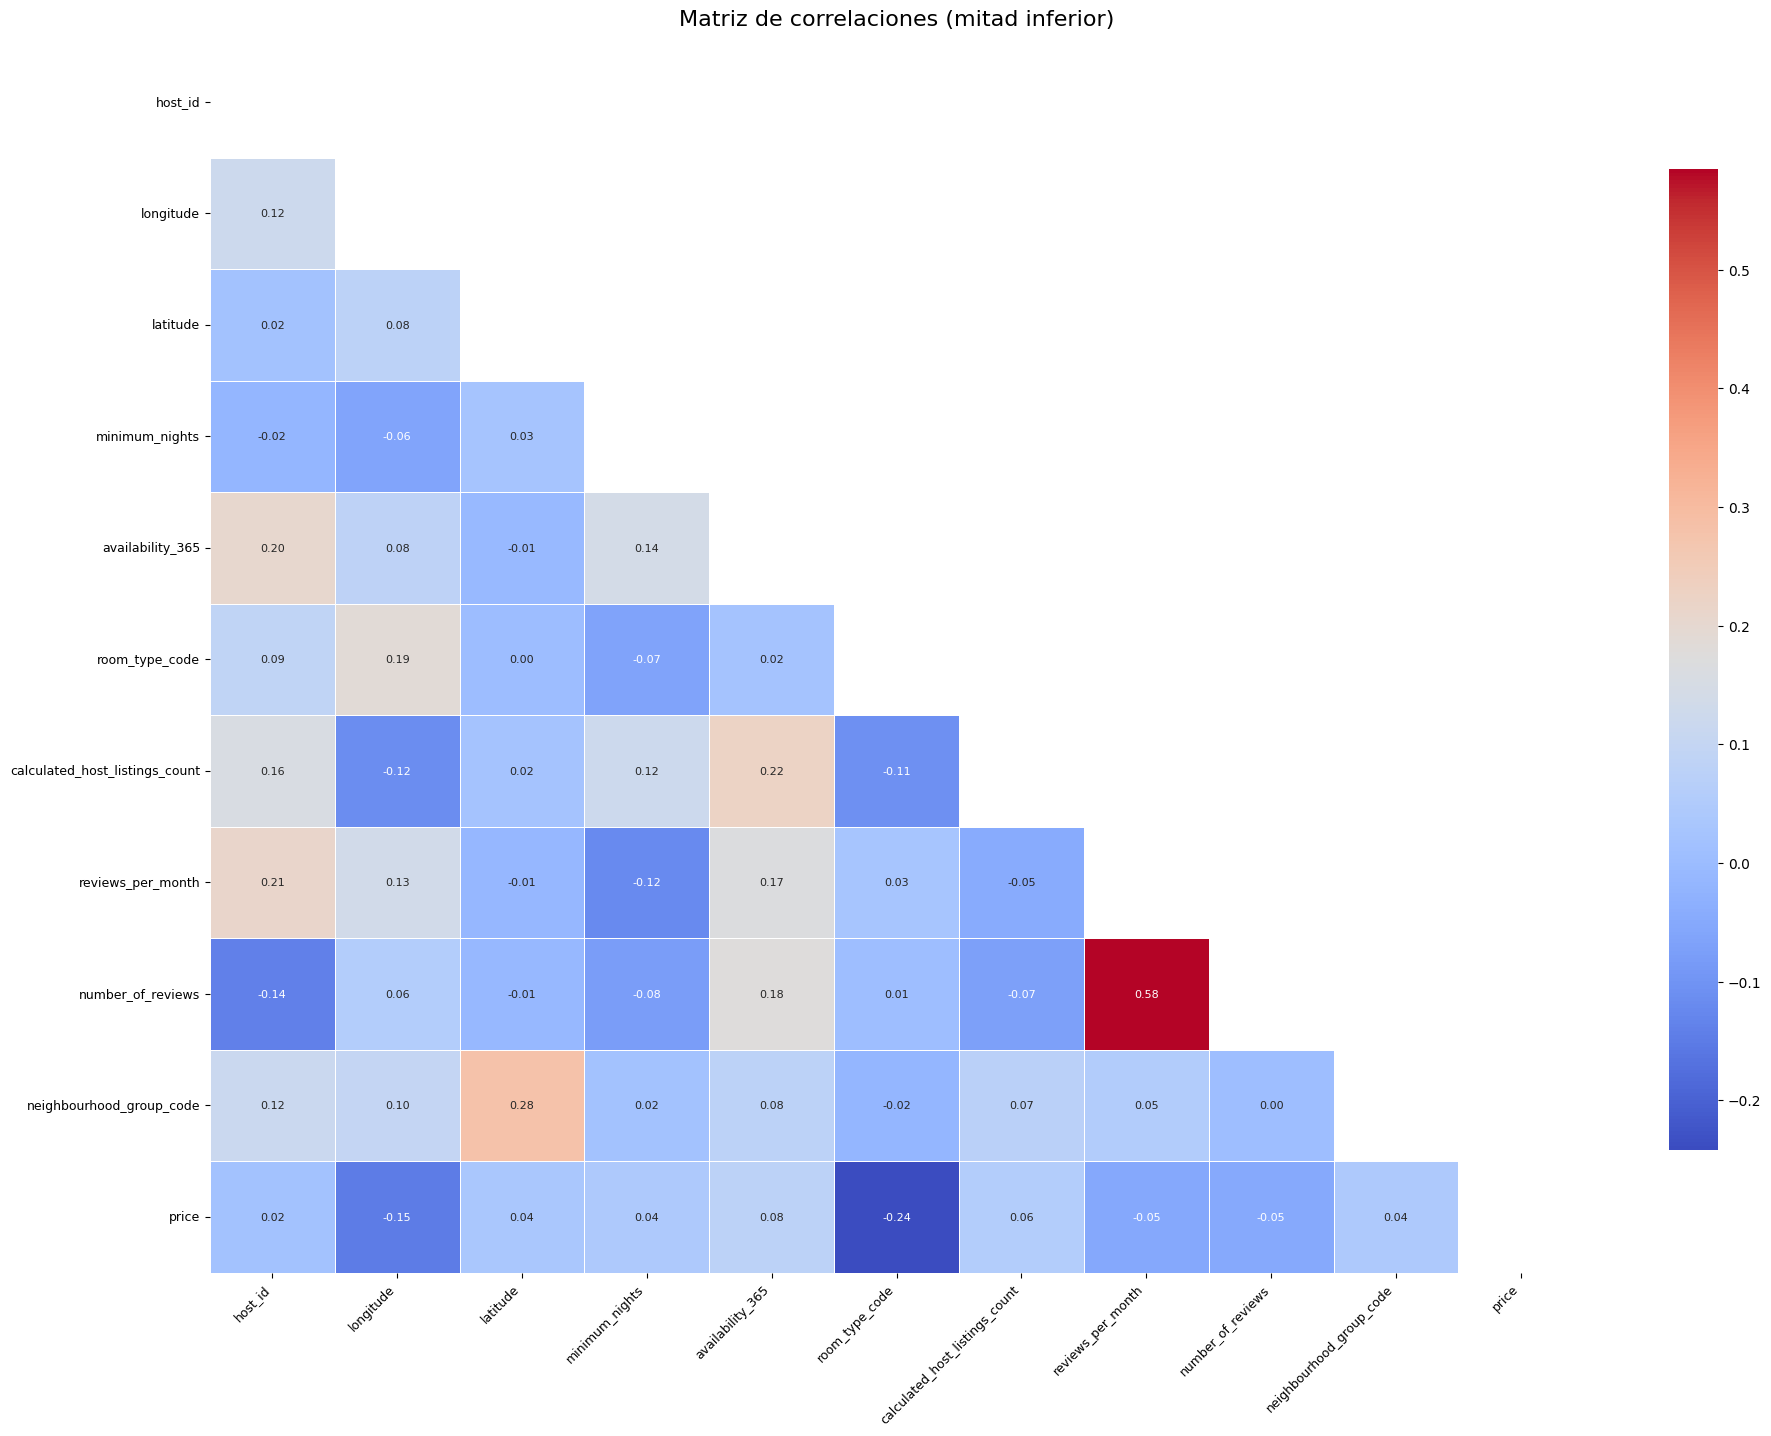

In [44]:
X_copy = X_num[features].copy()
X_copy['price'] = y_train
corr = X_copy.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(20, 15))
sns.heatmap(
    corr, mask=mask, cmap='coolwarm',
    annot=True, fmt=".2f", linewidths=.5,
    cbar_kws={"shrink": .8},
    annot_kws={"size": 8}
)
plt.title("Matriz de correlaciones (mitad inferior)", fontsize=16, pad=15)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

In [45]:
cv_results1 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_num[features], y_train, cv=3, scoring='r2')

In [46]:
y_train

id
25674366    295
19100971     70
24209867     58
22451798     75
5344850      38
           ... 
8754339      60
34383329     85
30109697    130
304799      150
12775106    120
Name: price, Length: 39116, dtype: int64

In [47]:
cv_results1

array([0.16266141, 0.11100673, 0.06920348])

In [48]:
cv_results1.mean()

np.float64(0.11429053937395683)

In [49]:
cv_results2 = cross_val_score(RandomForestRegressor(random_state=42,n_jobs=-1), X_num[features].drop(['reviews_per_month','number_of_reviews'],axis=1), y_train, cv=3, scoring='neg_mean_absolute_percentage_error')

In [50]:
cv_results2.mean()*-1

np.float64(85406123671416.14)